# Title:

# **Student Performance Prediction Analysis**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
student_math_df = pd.read_csv('mat2.csv')
student_port_df = pd.read_csv('por2.csv')

In [14]:
print('Length of datasets', len(student_math_df))
print('Columns: ', student_math_df.columns)
print("Shape: ", student_math_df.shape)

student_math_df.head()

Length of datasets 395
Columns:  Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Shape:  (395, 34)


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
print('Length of datasets', len(student_port_df))
print('Columns: ', student_port_df.columns)
print("Shape: ", student_port_df.shape)
student_port_df.head()

Length of datasets 649
Columns:  Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Shape:  (649, 34)


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
student_math_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

In [17]:
student_port_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  649 non-null    int64 
 1   school      649 non-null    object
 2   sex         649 non-null    object
 3   age         649 non-null    int64 
 4   address     649 non-null    object
 5   famsize     649 non-null    object
 6   Pstatus     649 non-null    object
 7   Medu        649 non-null    int64 
 8   Fedu        649 non-null    int64 
 9   Mjob        649 non-null    object
 10  Fjob        649 non-null    object
 11  reason      649 non-null    object
 12  guardian    649 non-null    object
 13  traveltime  649 non-null    int64 
 14  studytime   649 non-null    int64 
 15  failures    649 non-null    int64 
 16  schoolsup   649 non-null    object
 17  famsup      649 non-null    object
 18  paid        649 non-null    object
 19  activities  649 non-null    object
 20  nursery   

In [19]:
student_math_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,395.0,197.000000,114.170924,0.0,98.5,197.0,295.5,394.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0


In [20]:
student_port_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,649.0,324.000000,187.494444,0.0,162.0,324.0,486.0,648.0
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0


In [21]:
math_missing_records_series = student_math_df.isnull().sum()
math_missing_records_series = math_missing_records_series[math_missing_records_series > 0]
math_missing_records_series

Series([], dtype: int64)

In [22]:
port_missing_records_series = student_port_df.isnull().sum()
port_missing_records_series = port_missing_records_series[port_missing_records_series > 0]
port_missing_records_series

Series([], dtype: int64)

In [46]:
student_math_df[student_math_df.duplicated()]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [45]:
student_port_df[student_port_df.duplicated()]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [30]:
math_categorical_columns = student_math_df.select_dtypes(include=['object']).columns

for column in math_categorical_columns:
  print(f"{column}: {student_math_df[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [31]:
port_categorical_columns = student_port_df.select_dtypes(include=['object']).columns

for column in port_categorical_columns:
  print(f"{column}: {student_port_df[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


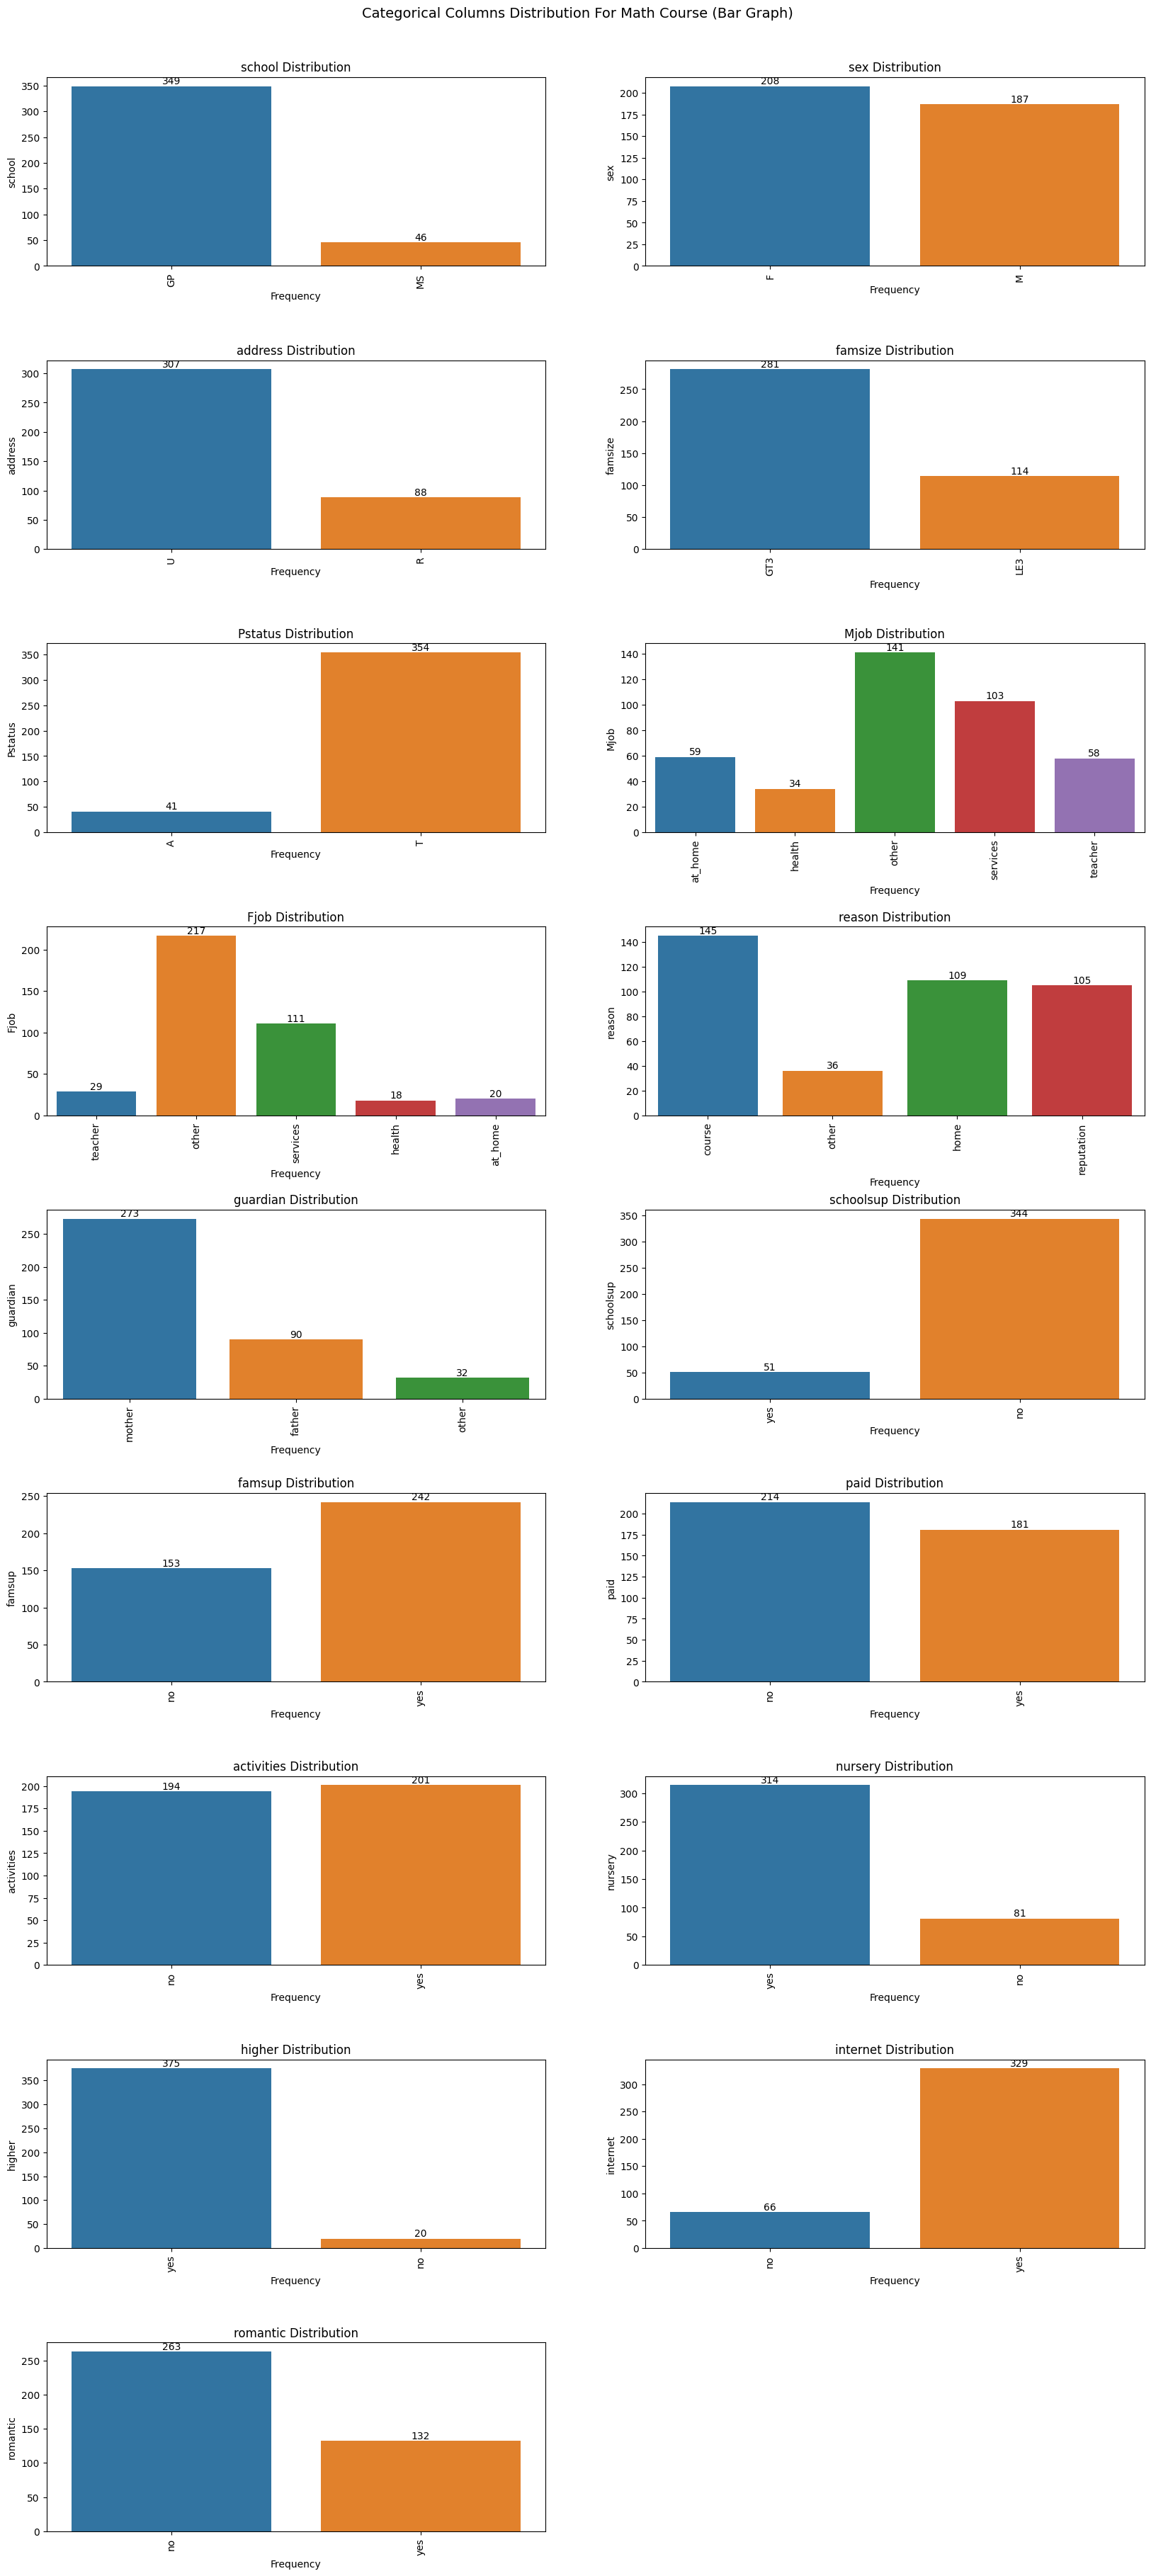

In [69]:
num_rows = len(math_categorical_columns) // 2 + len(math_categorical_columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

axes = np.array(axes).flatten()

for i, col in enumerate(math_categorical_columns.to_numpy()):
    r = i // 2
    c = i % 2
    if i < len(math_categorical_columns):
        sns.countplot(x=col, data=student_math_df, ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container, label_type="edge")
        axes[i].set_ylabel(f"{col}")
        axes[i].set_xlabel("Frequency")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
        axes[i].set_title(f"{col} Distribution")

if len(math_categorical_columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.9, "Categorical Columns Distribution For Math Course (Bar Graph)", va="center", ha="center", fontsize=14)
plt.show()

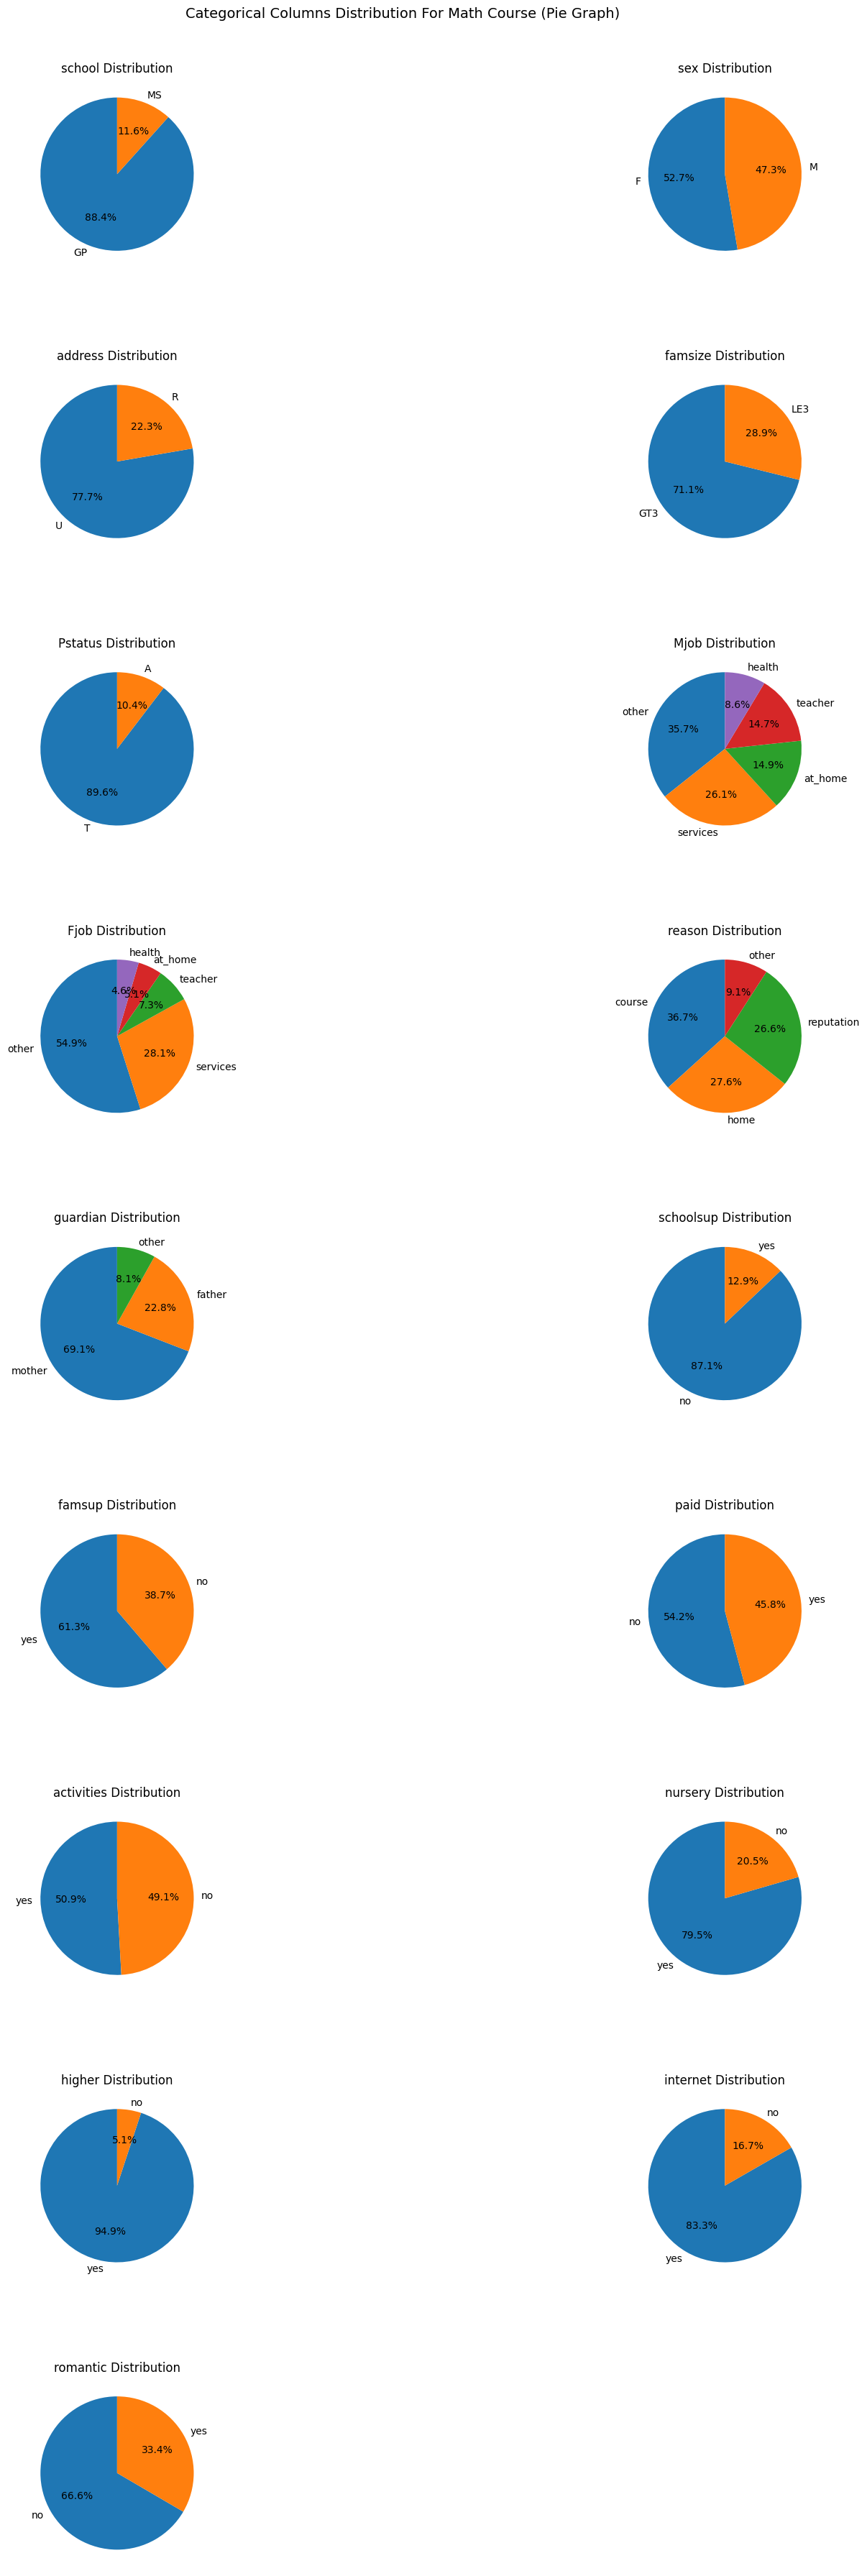

In [81]:
num_rows = len(math_categorical_columns) // 2 + len(math_categorical_columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

for i, col in enumerate(math_categorical_columns.to_numpy()):
    r = i // 2
    c = i % 2
    if i < len(math_categorical_columns):
        counts = student_math_df[col].value_counts()
        axes[r,c].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[r,c].set_title(f"{col} Distribution")

if len(math_categorical_columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust layout and show the plot
plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.9, "Categorical Columns Distribution For Math Course (Pie Graph)", va="center", ha="center", fontsize=14)
plt.show()

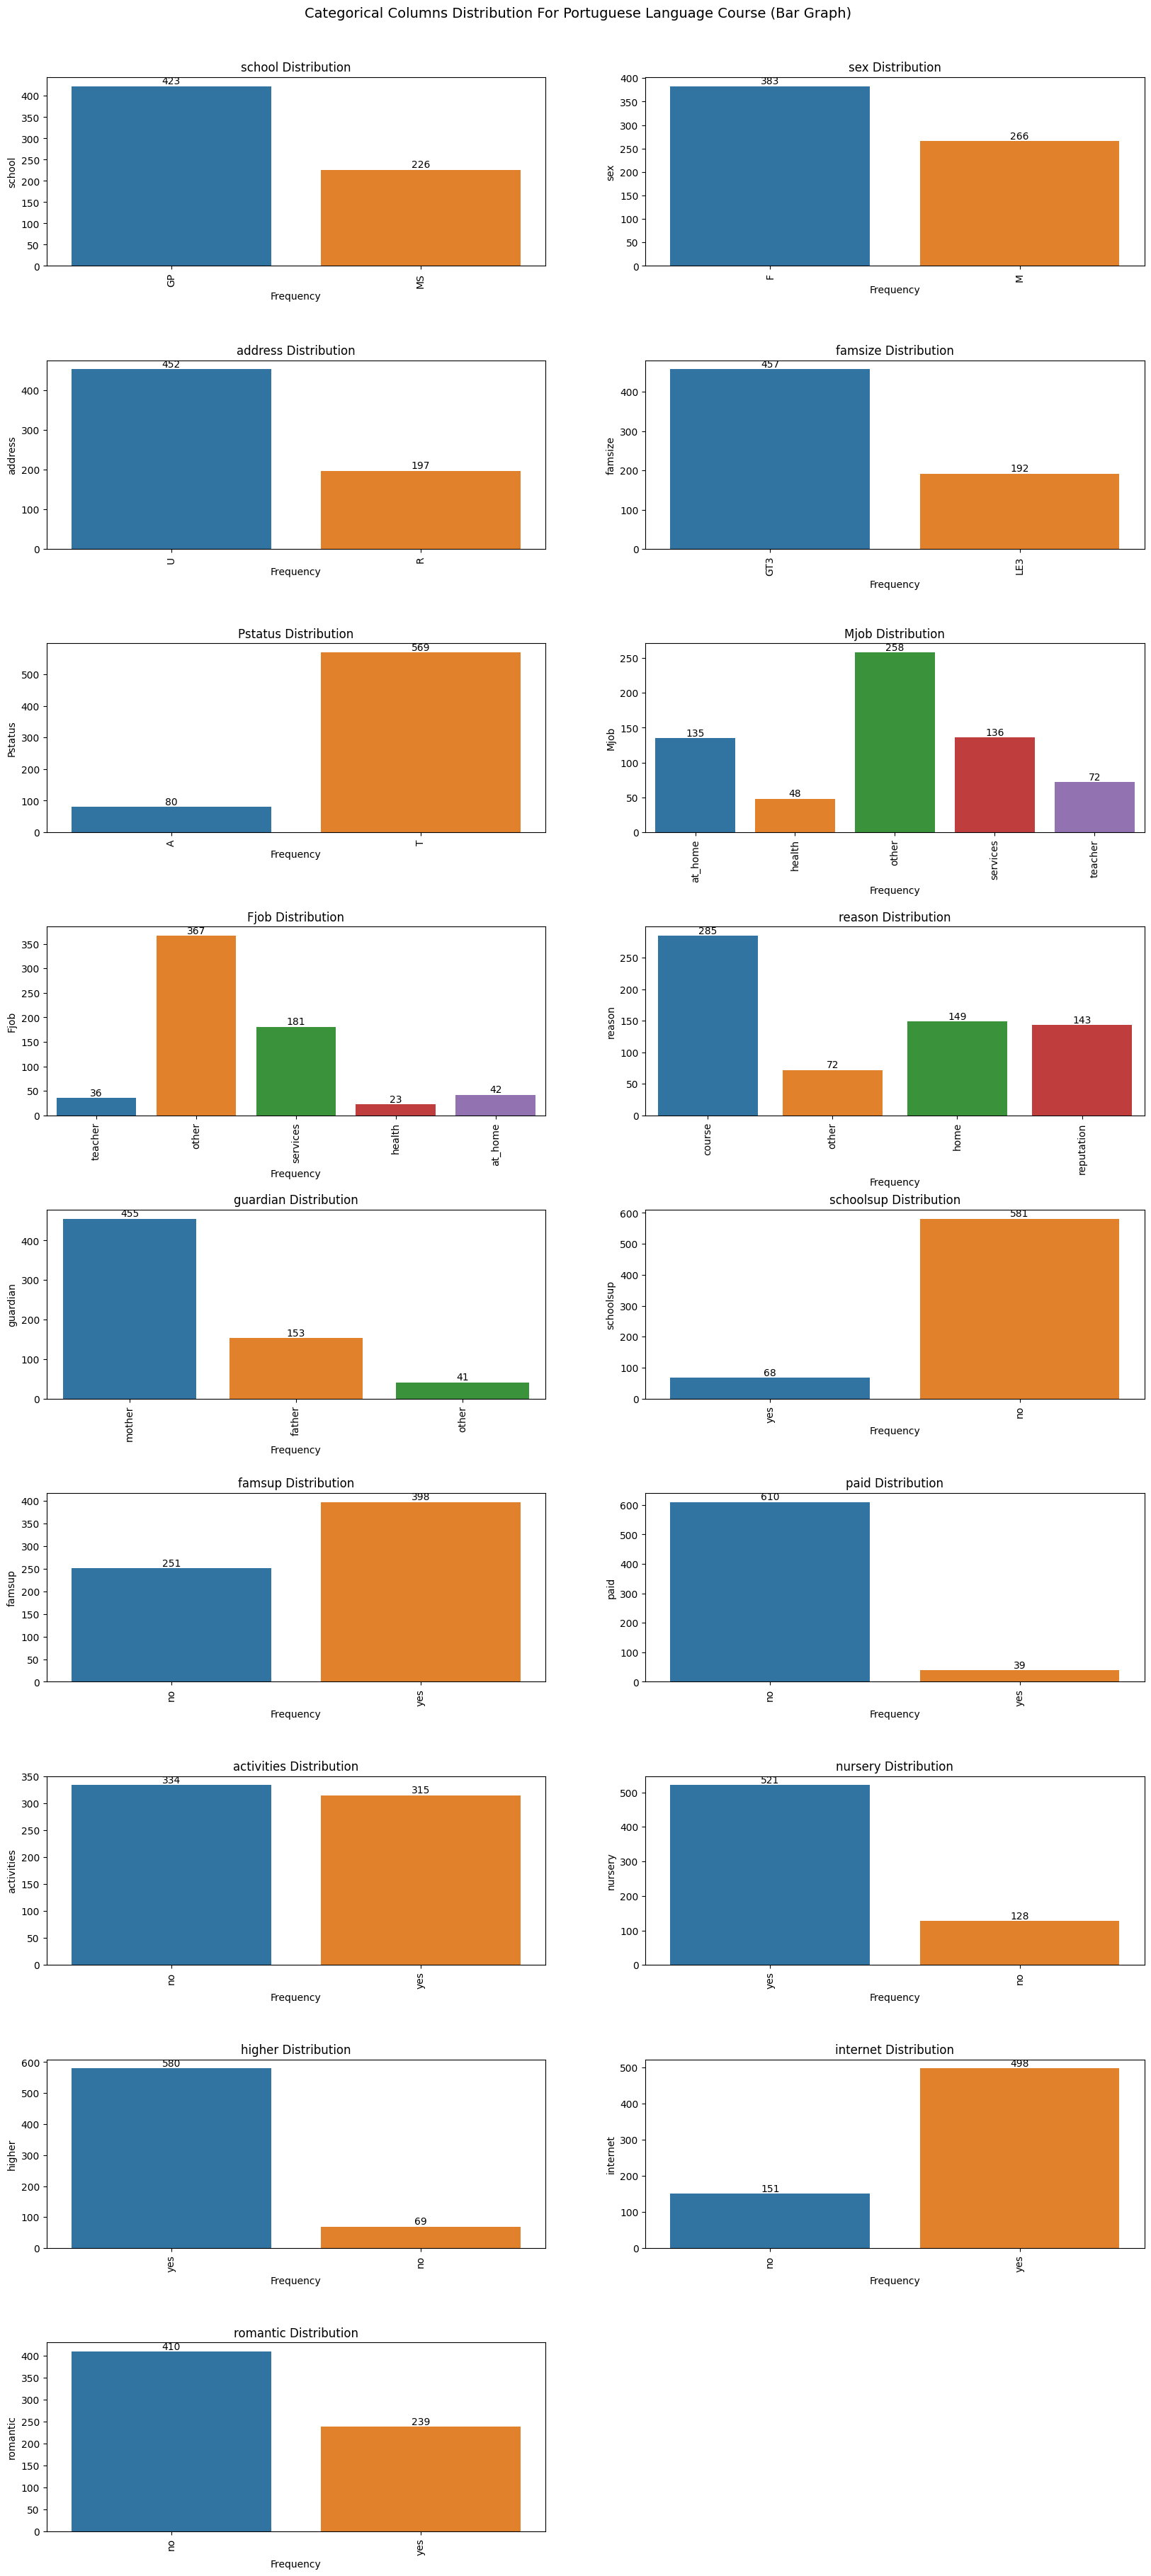

In [71]:
num_rows = len(port_categorical_columns) // 2 + len(port_categorical_columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

axes = np.array(axes).flatten()

for i, col in enumerate(port_categorical_columns.to_numpy()):
    r = i // 2
    c = i % 2
    if i < len(port_categorical_columns):
        sns.countplot(x=col, data=student_port_df, ax=axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container, label_type="edge")
        axes[i].set_ylabel(f"{col}")
        axes[i].set_xlabel("Frequency")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation="vertical")
        axes[i].set_title(f"{col} Distribution")

if len(port_categorical_columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.9, "Categorical Columns Distribution For Portuguese Language Course (Bar Graph)", va="center", ha="center", fontsize=14)
plt.show()

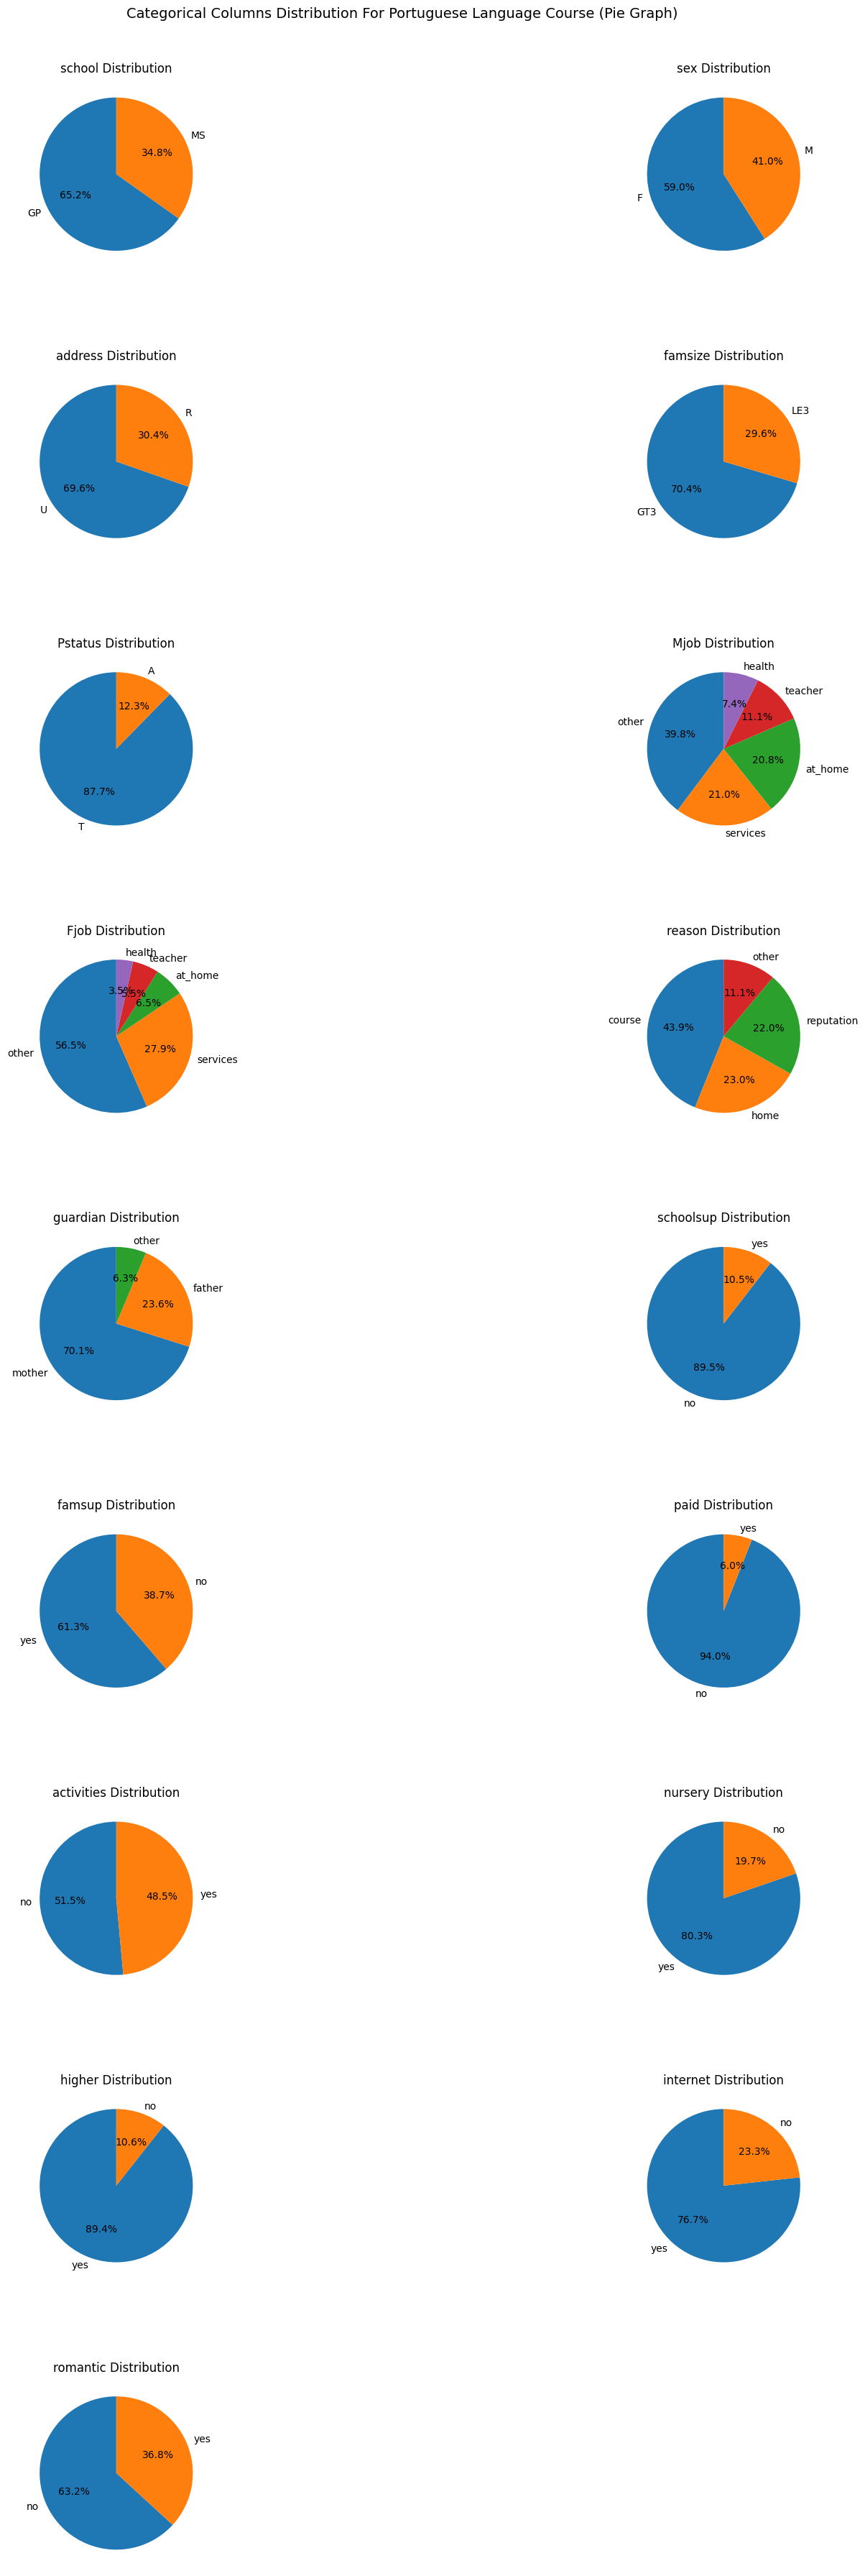

In [80]:
num_rows = len(port_categorical_columns) // 2 + len(port_categorical_columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

for i, col in enumerate(port_categorical_columns.to_numpy()):
    r = i // 2
    c = i % 2
    if i < len(port_categorical_columns):
        counts = student_port_df[col].value_counts()
        axes[r,c].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[r,c].set_title(f"{col} Distribution")

if len(port_categorical_columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust layout and show the plot
plt.subplots_adjust(hspace=0.5)
fig.text(0.5, 0.9, "Categorical Columns Distribution For Portuguese Language Course (Pie Graph)", va="center", ha="center", fontsize=14)
plt.show()

In [89]:
math_numerical_columns = student_math_df.select_dtypes(include=['number']).columns
math_numerical_columns = math_numerical_columns.drop(labels=['Unnamed: 0'])
math_numerical_columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

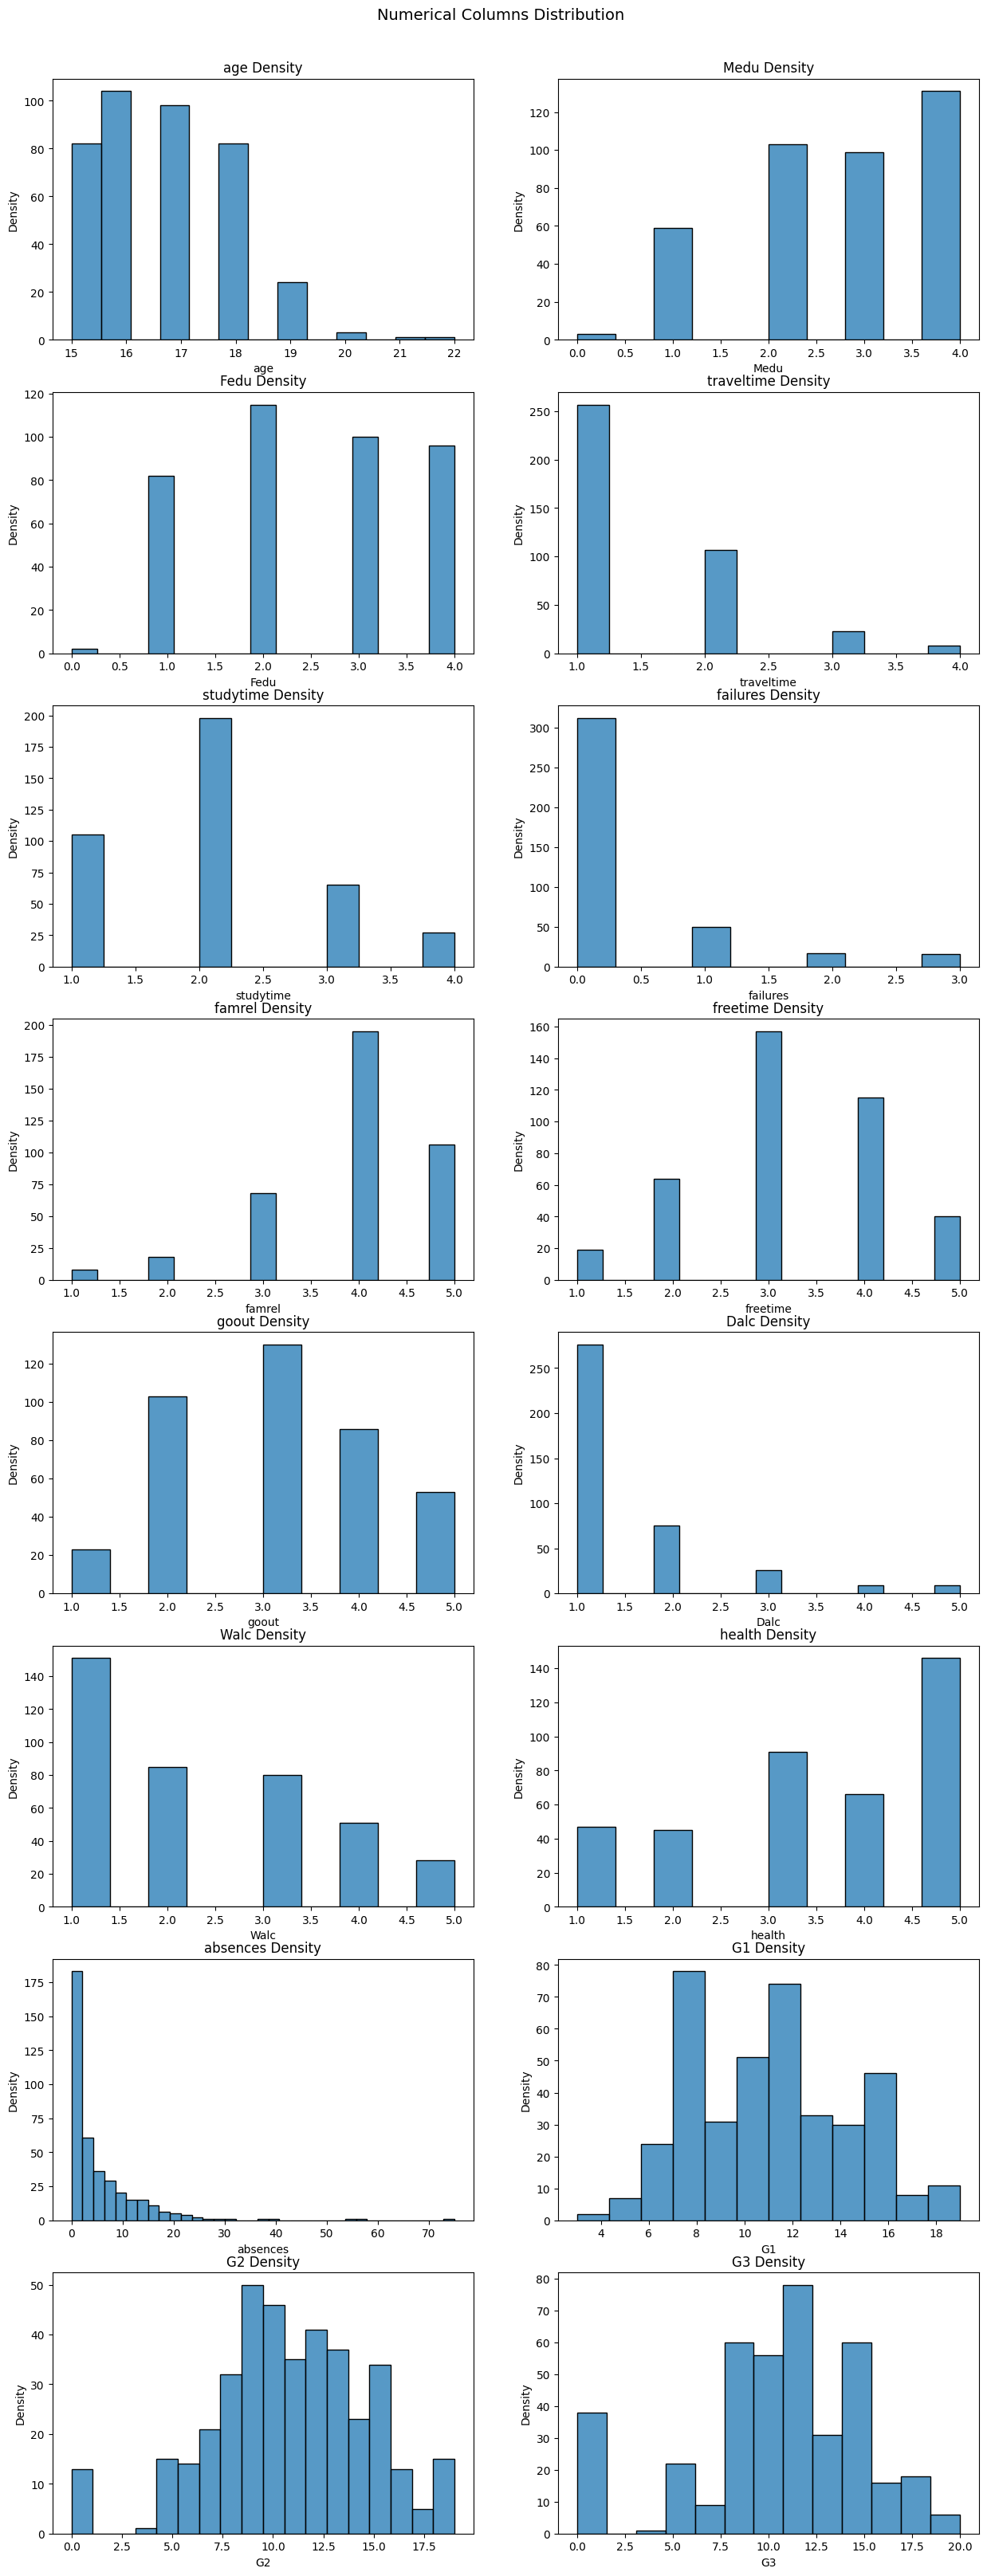

In [98]:
num_rows = len(math_numerical_columns) // 2 + len(math_numerical_columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

for i, col in enumerate(math_numerical_columns.to_numpy()):
    r = i // 2
    c = i % 2
    sns.histplot(x=col, data=student_math_df, ax=axes[r,c])
    axes[i//2,i%2].set_ylabel("Density")
    axes[i//2,i%2].set_title(f"{col} Density")

if len(math_numerical_columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1, -1])
fig.text(0.5,0.9,"Numerical Columns Distribution",va="center", ha="center", fontsize=14)
plt.show()

In [92]:
port_numerical_columns = student_port_df.select_dtypes(include=['number']).columns
port_numerical_columns = port_numerical_columns.drop(labels=['Unnamed: 0'])
port_numerical_columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

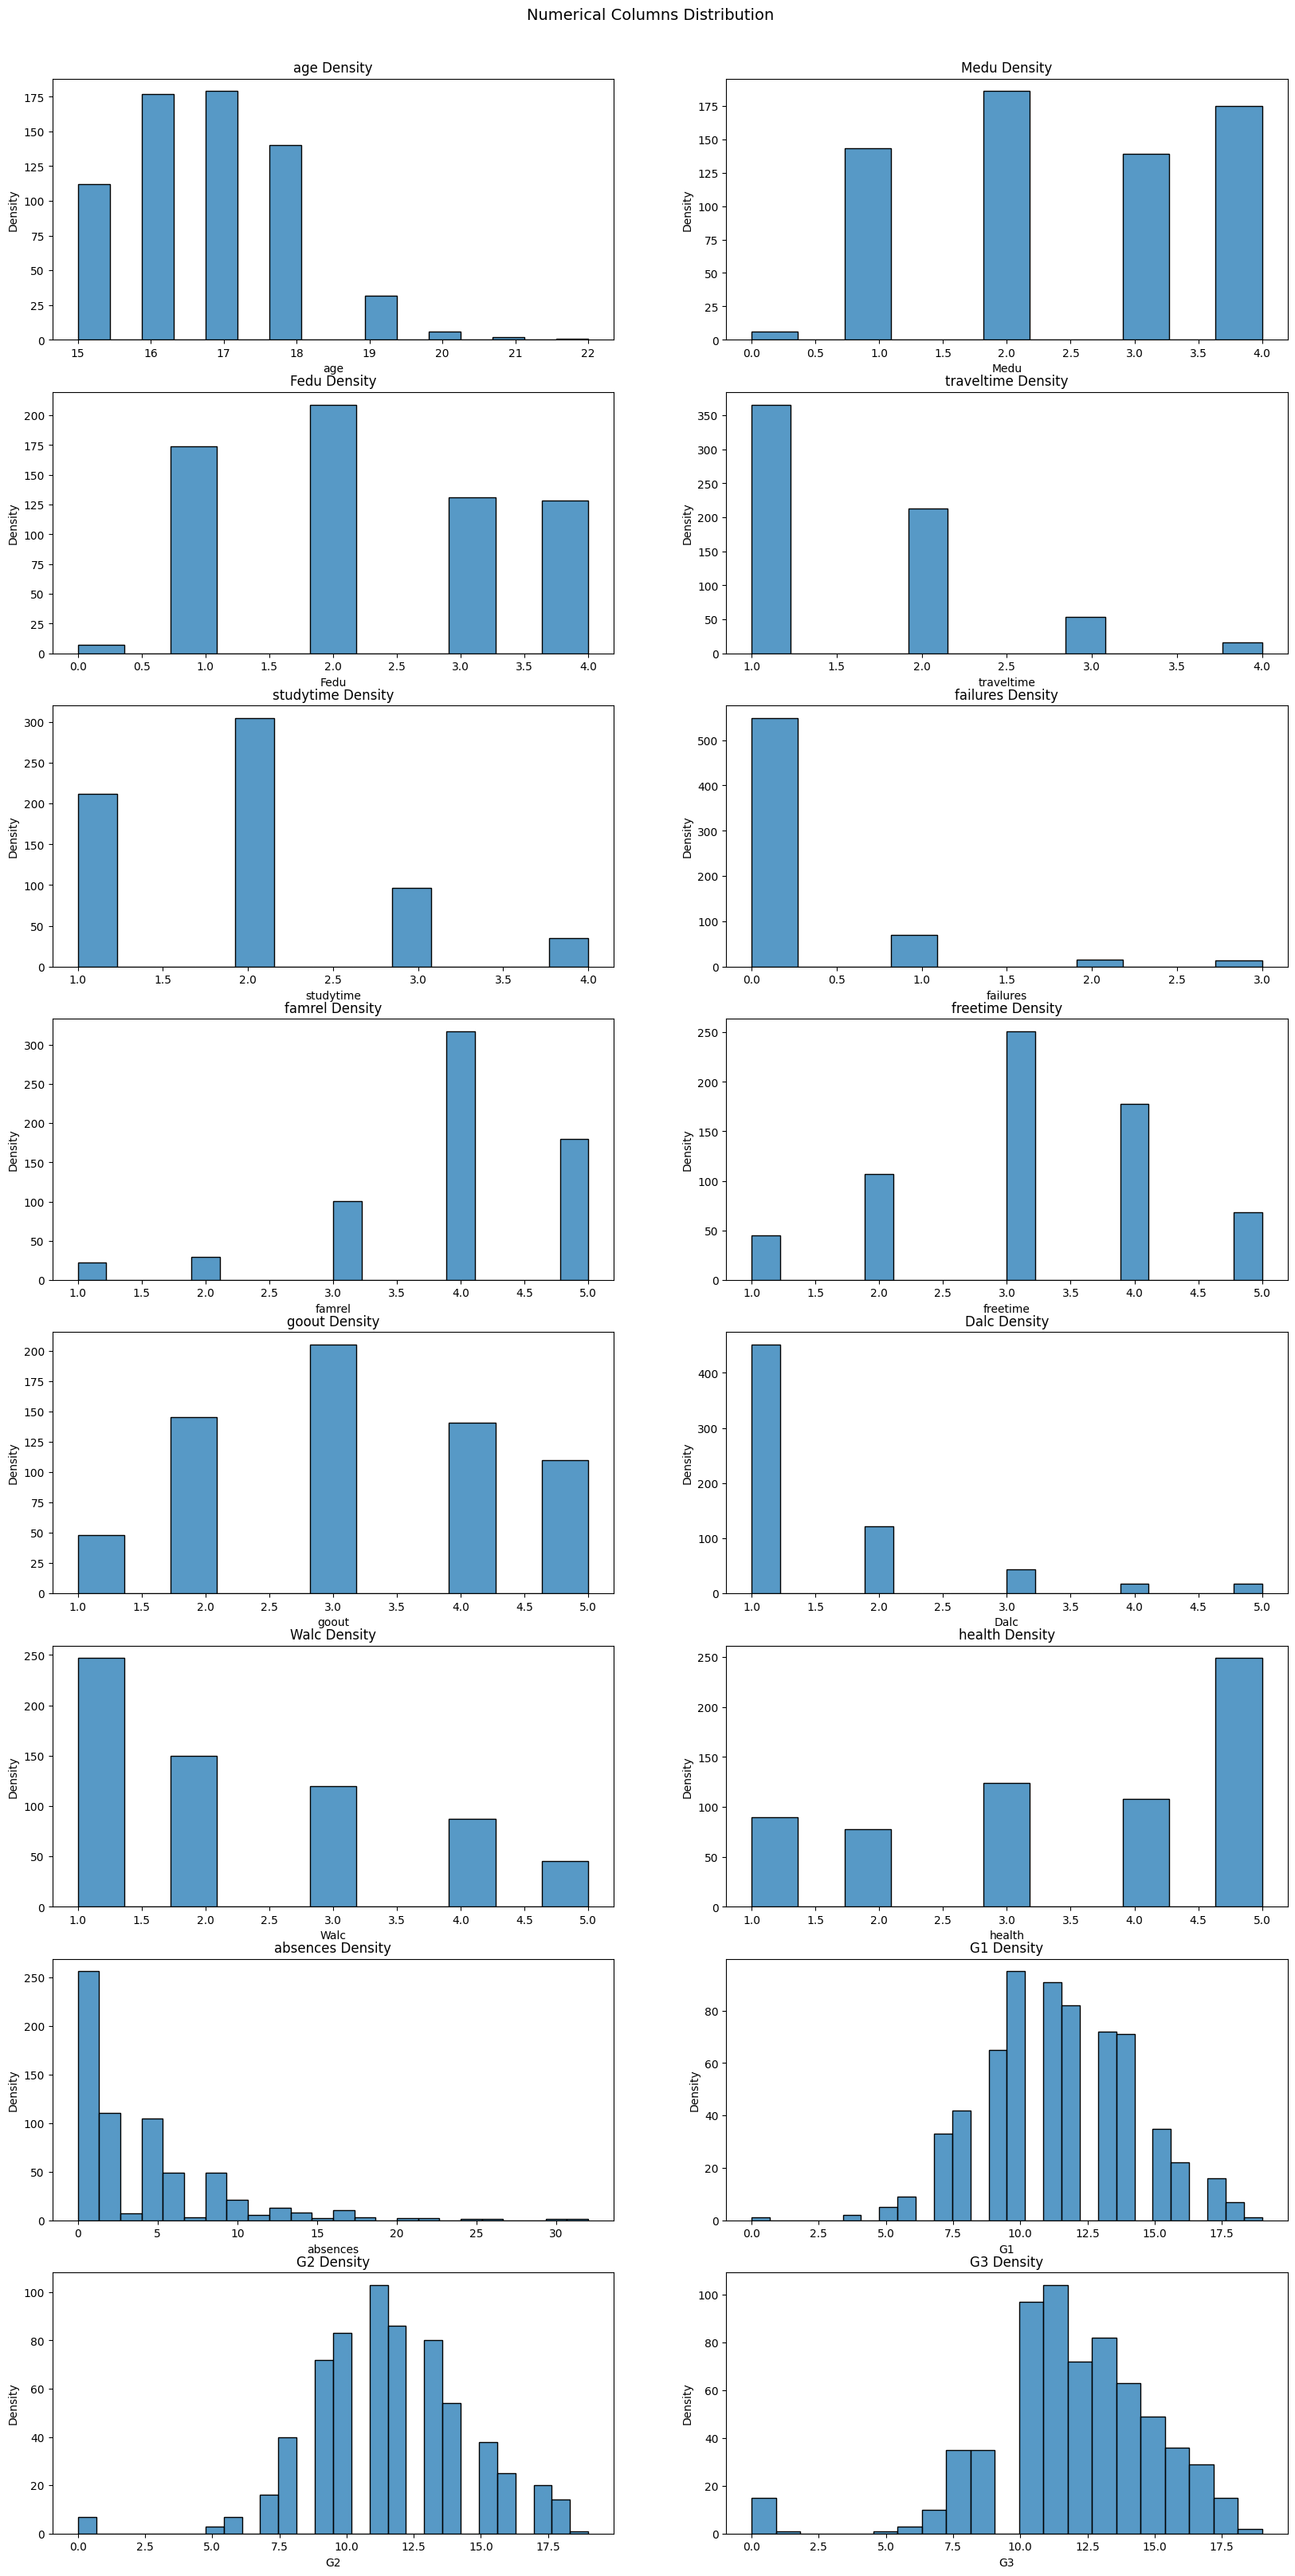

In [97]:
num_rows = len(port_numerical_columns) // 2 + len(port_numerical_columns) % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

for i, col in enumerate(port_numerical_columns.to_numpy()):
    r = i // 2
    c = i % 2
    sns.histplot(x=col, data=student_port_df, ax=axes[r,c])
    axes[i//2,i%2].set_ylabel("Density")
    axes[i//2,i%2].set_title(f"{col} Density")

if len(port_numerical_columns.to_numpy()) % 2 != 0:
    fig.delaxes(axes[-1, -1])
fig.text(0.5,0.9,"Numerical Columns Distribution",va="center", ha="center", fontsize=14)
plt.show()